In [1]:
def encode_lrc(message_1, message_2, message_3, message_4):
    lrc = ""
    for i in range(len(message_1)):
        message_1_int = int(message_1[i])
        message_2_int = int(message_2[i])
        message_3_int = int(message_3[i])
        message_4_int = int(message_4[i])
        zminna = message_1_int ^ message_2_int ^ message_3_int ^ message_4_int
        lrc += str(zminna)
    return lrc


message_1 = "11100111"
message_2 = "11011101"
message_3 = "00111001"
message_4 = "10101001"
lrc = encode_lrc(message_1, message_2, message_3, message_4)
print(lrc)

10101010


In [2]:
import random


def generate_blocks(num_blocks, num_messages, message_length):
    blocks = []
    for _ in range(num_blocks):
        block = []
        for _ in range(num_messages):
            message = "".join(str(random.randint(0, 1)) for _ in range(message_length))
            block.append(message)
        blocks.append(block)
    return blocks


num_blocks = 10000
num_messages = 4
message_length = 8

blocks = generate_blocks(num_blocks, num_messages, message_length)
print("Generated blocks:")
for block in blocks[:3]:
    print(block)

Generated blocks:
['11000101', '00011100', '01000001', '00001111']
['00010000', '11010000', '11100100', '01111111']
['00100001', '10001111', '01000000', '01101110']


In [3]:
import random


def introduce_errors(blocks, error_probability):
    new_blocks = []
    for block in blocks:
        new_block = []
        for message in block:
            new_message = ""
            for i in range(len(message)):
                if random.random() < error_probability:
                    new_message += "0" if message[i] == "1" else "1"
                else:
                    new_message += message[i]
            new_block.append(new_message)
        new_blocks.append(new_block)
    return new_blocks


blocks = generate_blocks(num_blocks, num_messages, message_length)
print("Generated blocks:")
for block in blocks[:3]:
    print(block)

error_probability = 0.3
block_with_errors = introduce_errors(blocks, error_probability)

print("Перший блок після введення помилок:")
for block in block_with_errors[:3]:
    print(block)

Generated blocks:
['10001001', '01101111', '11001100', '01101100']
['01001001', '10010011', '11010010', '00011110']
['11110111', '00011001', '10010000', '01110000']
Перший блок після введення помилок:
['11101001', '00011100', '11000010', '01011110']
['01001100', '10100111', '10010011', '01011110']
['10000101', '00101011', '00001000', '00110000']


In [4]:
def detect_errors(block_with_errors, lrc):
    new_lrc = ""
    for i in range(len(block_with_errors[0])):
        message_1_int = int(block_with_errors[0][i])
        message_2_int = int(block_with_errors[1][i])
        message_3_int = int(block_with_errors[2][i])
        message_4_int = int(block_with_errors[3][i])
        zminna = message_1_int ^ message_2_int ^ message_3_int ^ message_4_int
        new_lrc += str(zminna)

    for i in range(len(lrc)):
        if lrc[i] != new_lrc[i]:
            return "Error occured", lrc[i], i


for k, block in enumerate(blocks):
    for i in range(0, len(block), 4):
        lrc = encode_lrc(block[i], block[i + 1], block[i + 2], block[i + 3])
        errors = detect_errors(block_with_errors[k], lrc)
        print(errors)

('Error occured', '0', 2)
('Error occured', '0', 2)
('Error occured', '0', 0)
('Error occured', '1', 0)
('Error occured', '1', 0)
('Error occured', '0', 0)
('Error occured', '0', 0)
('Error occured', '1', 0)
('Error occured', '0', 0)
('Error occured', '1', 1)
('Error occured', '1', 0)
('Error occured', '0', 3)
('Error occured', '1', 0)
('Error occured', '1', 1)
('Error occured', '0', 4)
('Error occured', '0', 0)
('Error occured', '1', 0)
('Error occured', '0', 1)
('Error occured', '0', 4)
('Error occured', '0', 4)
('Error occured', '1', 0)
('Error occured', '0', 0)
('Error occured', '1', 0)
('Error occured', '1', 1)
('Error occured', '1', 0)
('Error occured', '1', 0)
('Error occured', '0', 5)
('Error occured', '0', 2)
('Error occured', '0', 5)
('Error occured', '0', 2)
('Error occured', '0', 6)
('Error occured', '0', 1)
('Error occured', '1', 1)
('Error occured', '0', 0)
('Error occured', '0', 0)
('Error occured', '1', 1)
('Error occured', '1', 3)
('Error occured', '0', 0)
('Error occu

In [5]:
NUM_OF_BLOCKS = 10000
NUM_OF_MESSAGES_PER_BLOCK = 4
MESSAGE_LEN = 8

BLOCKS = generate_blocks(NUM_OF_BLOCKS, NUM_OF_MESSAGES_PER_BLOCK, MESSAGE_LEN)

ERROR_PROB = 0.3

BLOCKS_WITH_ERRORS = introduce_errors(BLOCKS, ERROR_PROB)

for k, block in enumerate(BLOCKS):
    for i in range(0, len(block), 4):
        lrc = encode_lrc(block[i], block[i + 1], block[i + 2], block[i + 3])
        errors = detect_errors(BLOCKS_WITH_ERRORS[k], lrc)
        print(errors)

('Error occured', '0', 4)
('Error occured', '0', 0)
('Error occured', '1', 1)
('Error occured', '1', 2)
('Error occured', '1', 0)
('Error occured', '1', 0)
('Error occured', '1', 0)
('Error occured', '0', 2)
('Error occured', '1', 0)
('Error occured', '1', 0)
('Error occured', '1', 3)
('Error occured', '0', 1)
('Error occured', '1', 2)
('Error occured', '0', 2)
('Error occured', '1', 5)
('Error occured', '0', 1)
('Error occured', '0', 0)
('Error occured', '0', 0)
('Error occured', '1', 3)
('Error occured', '0', 2)
('Error occured', '0', 3)
('Error occured', '0', 0)
('Error occured', '1', 1)
('Error occured', '1', 0)
('Error occured', '1', 0)
('Error occured', '1', 0)
('Error occured', '1', 2)
('Error occured', '1', 3)
('Error occured', '1', 1)
('Error occured', '1', 2)
('Error occured', '0', 0)
('Error occured', '0', 3)
('Error occured', '1', 0)
('Error occured', '0', 5)
('Error occured', '0', 0)
('Error occured', '1', 2)
('Error occured', '0', 0)
('Error occured', '1', 0)
('Error occu

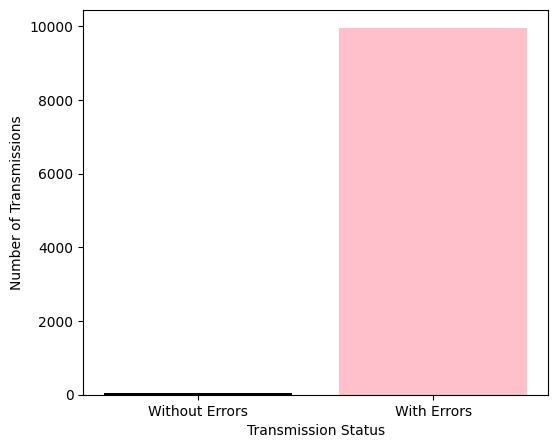

In [7]:
import matplotlib.pyplot as plt


def count_successful_transmissions(blocks, lrcs):
    successful_transmissions = 0
    for i, block in enumerate(blocks):
        error = detect_errors(block, lrcs[i])
        if error is None:
            successful_transmissions += 1
    return successful_transmissions


def count_unsuccessful_transmissions(blocks_errors, lrcs):
    unsuccessful_transmissions = 0
    for i, error_block in enumerate(blocks_errors):
        error = detect_errors(error_block, lrcs[i])
        if error:
            unsuccessful_transmissions += 1
    return unsuccessful_transmissions


def compare_transmissions(
    num_blocks, num_messages_per_block, message_length, error_probability
):
    blocks = generate_blocks(num_blocks, num_messages_per_block, message_length)
    blocks_with_errors = introduce_errors(blocks, error_probability)

    lrcs = [encode_lrc(*block) for block in blocks]

    successful_without_errors = count_successful_transmissions(blocks_with_errors, lrcs)
    unsuccessful_with_errors = count_unsuccessful_transmissions(
        blocks_with_errors, lrcs
    )

    return successful_without_errors, unsuccessful_with_errors


NUM_OF_BLOCKS = 10000
NUM_OF_MESSAGES_PER_BLOCK = 4
MESSAGE_LEN = 8
ERROR_PROB = 0.3

successful_without_errors, unsuccessful_with_errors = compare_transmissions(
    NUM_OF_BLOCKS, NUM_OF_MESSAGES_PER_BLOCK, MESSAGE_LEN, ERROR_PROB
)

labels = ["Without Errors", "With Errors"]
success_counts = [successful_without_errors, unsuccessful_with_errors]

plt.figure(figsize=(6, 5))
plt.bar(labels, success_counts, color=["black", "pink"])
plt.xlabel("Transmission Status")
plt.ylabel("Number of Transmissions")
plt.title("")
plt.show()